# Data Science Project: Individual


Github link: https://github.com/iriszovo/dsci-project


In [13]:
library(tidyverse)
library(scales)


# players dataset

- 196 observations
- 7 variables

## Variables
- experience(character):
Game experience level

- subscribe(logical):
Newsletter subscription status

- hashedEmail(character):
Hashed email address

- played_hours(double):
Total play hours

- name(character):
Player's name

- gender(character):
Player's gender

- Age(double):
Player's age

- The tibble players_summary_stat shows the mean and standard deviation of played_hours and Age.

## Issues
- experience and gender should be factors, not character
- Age contains NAs
- Potential issue: self-reported experience may be subjective

Data Collection: https://plaicraft.ai.


In [14]:
players <- read_csv("https://raw.githubusercontent.com/iriszovo/dsci-project/refs/heads/main/players.csv")
head(players, n=6)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [15]:
players_summary_stat <- players|>
summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
          sd_played_hours = sd(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE),
          sd_age = sd(Age, na.rm = TRUE))|>
round(2)
players_summary_stat


mean_played_hours,sd_played_hours,mean_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,21.14,7.39


# sessions dataset

- 1535 observations
- 5 variables

## Variable 
- hashedEmail(character):
Hashed email address

- start_time (character):
Session start in date-time format

- end_time (character):
Session end in date-time format

- original_start_time (double):
Session start as Unix timestamp.

- original_end_time (double):
Session end as Unix timestamp.

The tibble sessions_summary_stat shows the mean and standard deviation of original_start_time and original_end_time.

## Issues 
- Data not tidy: date and time combined in start_time and end_time columns
- All data objective, no apparent potential issue

Data collection: https://plaicraft.ai.


In [16]:
sessions <- read_csv("https://raw.githubusercontent.com/iriszovo/dsci-project/refs/heads/main/sessions.csv")
head(sessions, n=6)


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [17]:
sessions_summary_stat <- sessions|>
summarize(mean_o_start_time = mean(original_start_time, na.rm=TRUE),
         sd_o_start_time = sd(original_start_time, na.rm=TRUE),
         mean_o_end_time = mean(original_end_time, na.rm=TRUE),
         sd_o_end_time = sd(original_end_time, na.rm=TRUE))|>
round(2)
sessions_summary_stat

mean_o_start_time,sd_o_start_time,mean_o_end_time,sd_o_end_time
<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,3557491589,1.719196e+12,3552813134


# Questions
### Broad question: Question 2
### Specific question: Can age predict played hours?
Played hours represent player engagement and data contribution, longer playtime generates more data. This project focuses on played hours rather than session count. players dataset contains sufficient players with played hours data for analysis. To target this question, select Age and played_hours columns from players dataset.

# Exploratory Data Analysis and Visualization
- Dataset loaded using read_csv function.
- The player dataset is tidy. To address my question, select the Age and played_hours columns and remove NA values.

In [18]:
players_wrang <- players|>
select(Age, played_hours)|>
drop_na()
head(players_wrang, n= 6)


Age,played_hours
<dbl>,<dbl>
9,30.3
17,3.8
17,0.0
21,0.7
21,0.1
17,0.0


- Mean values for Age and played_hours reported in the tibble below.

In [19]:
players_mean <- players|>
summarise(played_hours_mean = mean(played_hours, na.rm=TRUE),
          age_mean = mean(Age, na.rm=TRUE))
players_mean


played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


- The scatterplot var_relation shows the negative relationship between players’ age and played hours, suggesting a weak non-linear relationship. 

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”


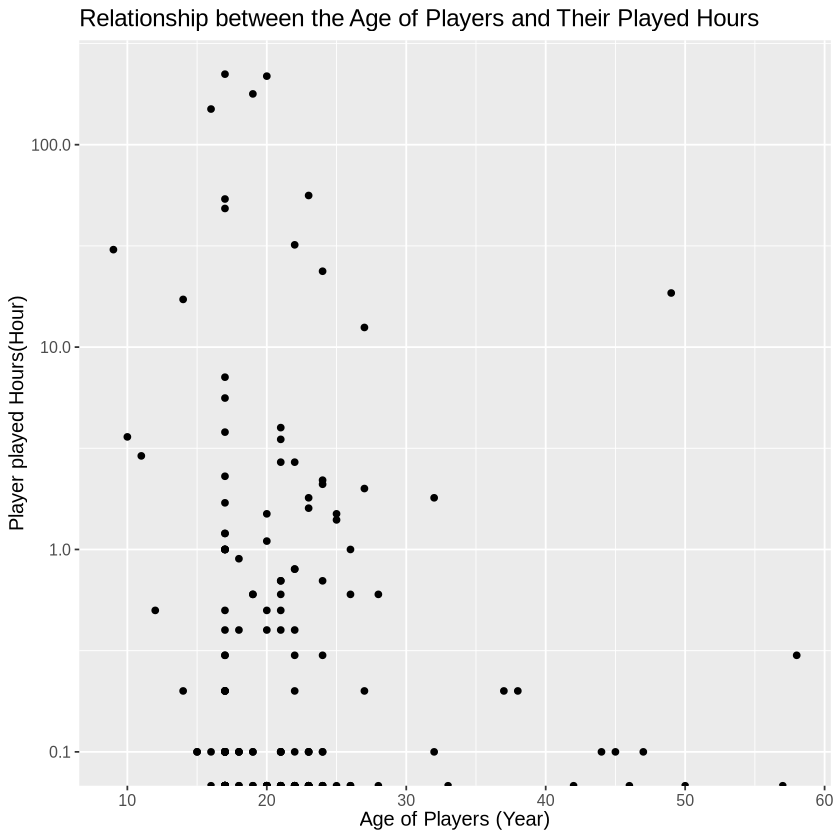

In [20]:
var_relation <- players_wrang|>
ggplot(aes(x= Age, y=played_hours))+
geom_point()+
labs(x="Age of Players (Year)", y="Player played Hours(Hour)", 
     title="Relationship between the Age of Players and Their Played Hours")+
scale_y_log10(labels = label_comma())+
theme(text = element_text(size = 12))
var_relation


- The histogram phr_hist reveals a right-skewed distribution, with many players having near-zero playtime. 

Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


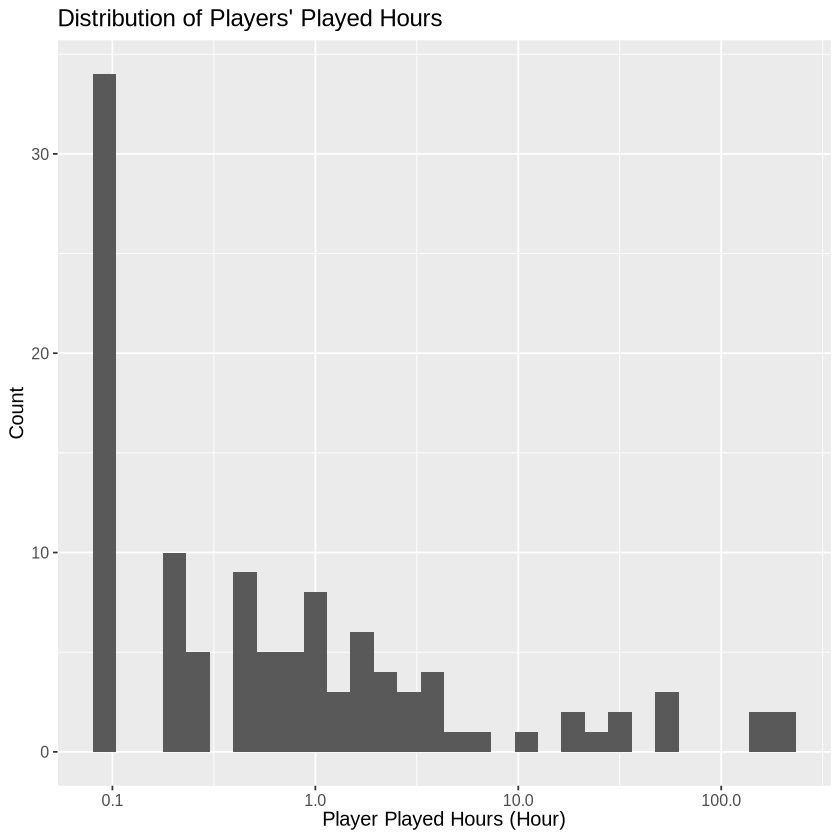

In [21]:
phr_hist <- players|>
ggplot(aes(x=played_hours))+
geom_histogram()+
labs(x="Player Played Hours (Hour)", y="Count", title="Distribution of Players' Played Hours")+
scale_x_log10(labels = label_comma())+
theme(text = element_text(size = 12))
phr_hist


- The histograms not_played_age and played_age compare players who played less than 0.5 hours and those who played more. Both groups are concentrated in the 15–18 age range, indicating that age does not effectively differentiate playtime. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


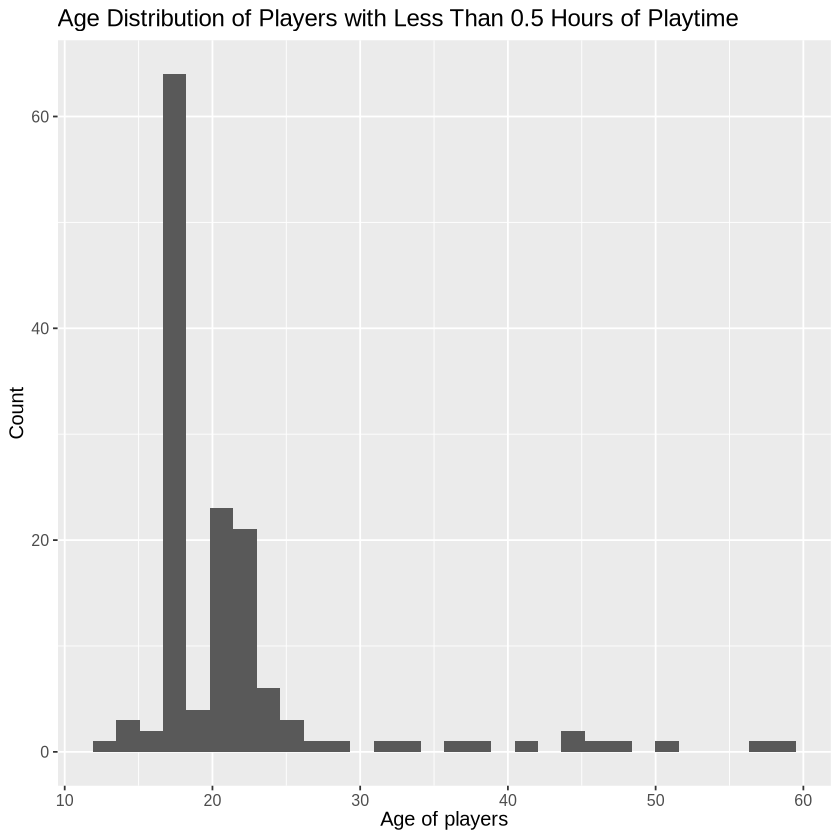

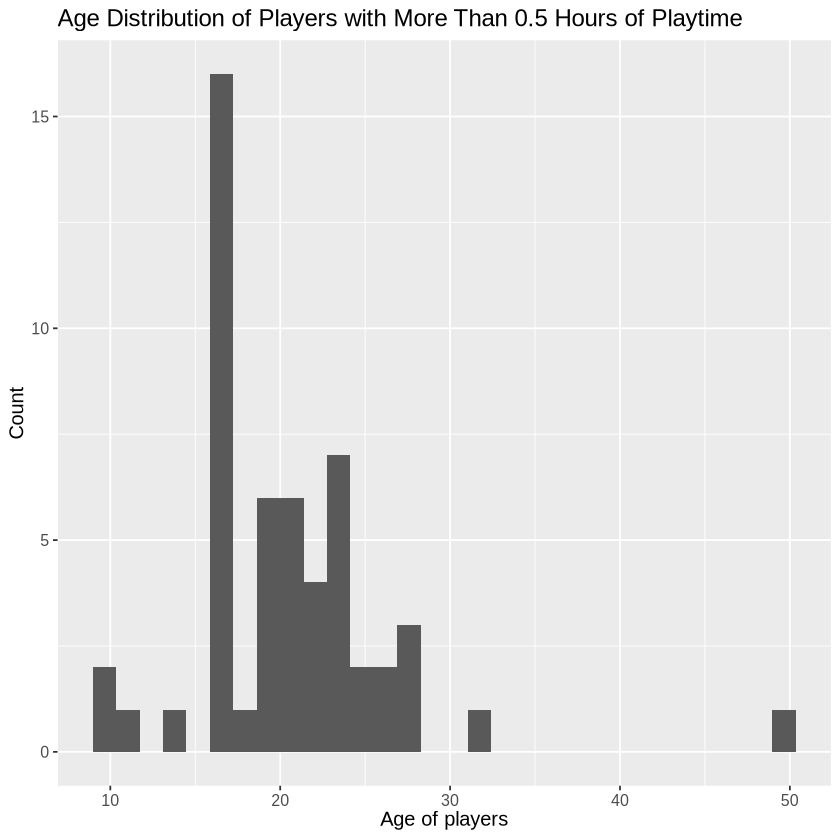

In [22]:
no_played_age <- players_wrang|>
filter(played_hours <= 0.5)|>
ggplot(aes(x= Age))+
geom_histogram()+
xlab("Age of players")+
ylab("Count")+
ggtitle("Age Distribution of Players with Less Than 0.5 Hours of Playtime")+
theme(text = element_text(size = 12))

played_age <- players_wrang|>
filter(played_hours > 0.5)|>
ggplot(aes(x= Age))+
geom_histogram()+
xlab("Age of players")+
ylab("Count")+
ggtitle("Age Distribution of Players with More Than 0.5 Hours of Playtime")+
theme(text = element_text(size = 12))

no_played_age
played_age

- The histogram age_hist shows that most players aged 18–23, which explains why both groups peak in the same range. Thus, age is not a strong predictor of played hours due to its biased distribution toward a single dominant age group.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


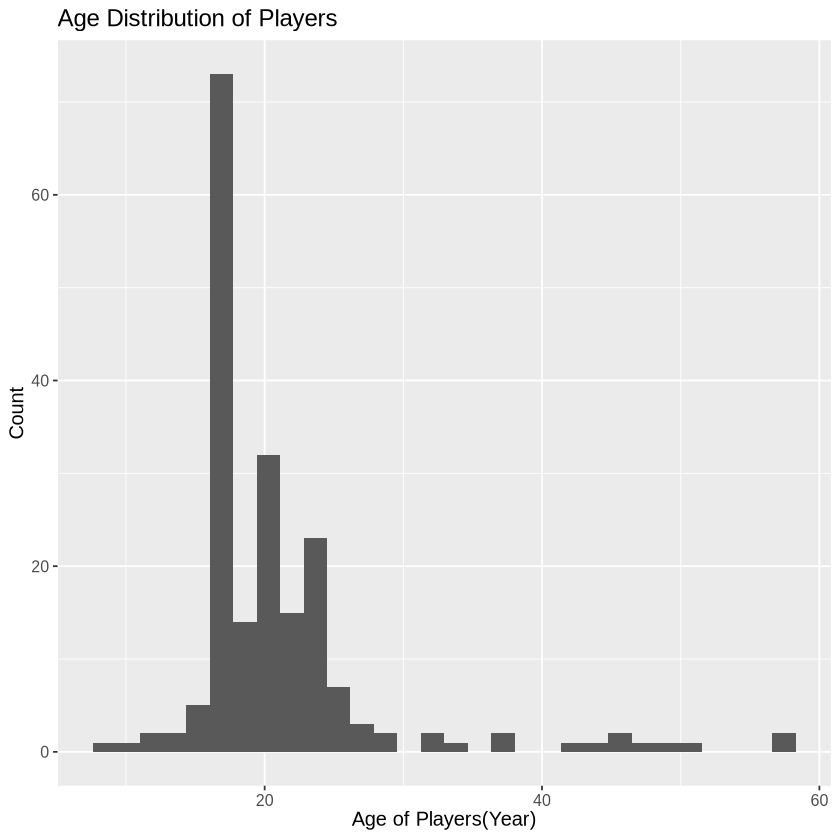

In [23]:
age_hist <- players_wrang|>
ggplot(aes(x= Age))+
geom_histogram()+
xlab("Age of Players(Year)")+
ylab("Count")+
ggtitle("Age Distribution of Players")+
theme(text = element_text(size = 12))
age_hist


# Methods and Plan
### Method: KNN regression
- This method is appropriate because the response variable (played_hours) is numeric, ruling out KNN classification. Scatterplot var_relation shows non-linear relationship between the predictor and response variable, making linear regression unsuitable.
- No assumptions for KNN regression.
- Limitation: May predict poorly as age increases due to sparse data points.
- I will test models with multiple k values; compare models' average RMSPE and select the one with the lowest RMSPE.
- The dataset will be split into two: 75% training / 25% testing (most common proportion) before designing the recipe. Data will be standardized for KNN distance calculations. Training set will train and tune the model; testing set will evaluate final performance. 5-fold cross-validation (most common fold) is necessary to select the optimal k. Each fold serves as a validation set to give the most unbiased evaluation of RMSPE for each k value.